
# Import packages and import data (do not change this)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, matthews_corrcoef, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Read the dataset from CSV
data = pd.read_csv('Synapse.csv')


# Function to plot the confusion matrix (do not change this)

In [2]:

def plot_confusion_matrix(cm, classifier_name):
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


# Function to plot the correlation matrix (do not change this)

In [3]:

def plot_correlation_matrix(data):
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True)
    plt.title('Feature Correlation Matrix')
    plt.show()


# Function to plot the correlation between features and the response variable (do not change this)

In [4]:

def plot_feature_response_correlation(data, response):
    correlation_matrix = data.corr()[response].sort_values(ascending=False)
    # Drop the response variable to avoid a self-correlation of 1
    correlation_matrix = correlation_matrix.drop(response, axis=0)
    
    sns.barplot(x=correlation_matrix.index, y=correlation_matrix.values)
    plt.title(f'Correlation with {response} Variable')
    plt.xlabel('Feature')
    plt.ylabel('Correlation coefficient')
    plt.xticks(rotation=90)  # Rotate the feature names for better readability
    plt.show()

# Define the feature set and the target variable (do not change this)

In [5]:
# Here we are asking to drop the featuers named "File" becuase its a text and not useful, and the label Bug because we can not have it amongs the features.
X = data.drop(['File', 'BUG'], axis=1)
# Here we are asking y to be the target variable, what we are trying to predict/ classify.
y = data['BUG']
x_bug = data.drop(['File'], axis=1)


# Here you get to choose which features to include. After runninng the entire code at least once, you can select which fetueres to be included to answer HW2 questions. 

In [6]:
#change_features = ['SUM_LOC-', 'SUM_LOC+', 'REF' ]  # Replace with your static features
#x_change = X[change_features]  # Select only static features


In [7]:
# Split the dataset into training and test sets (you can adjust the size of test set here)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


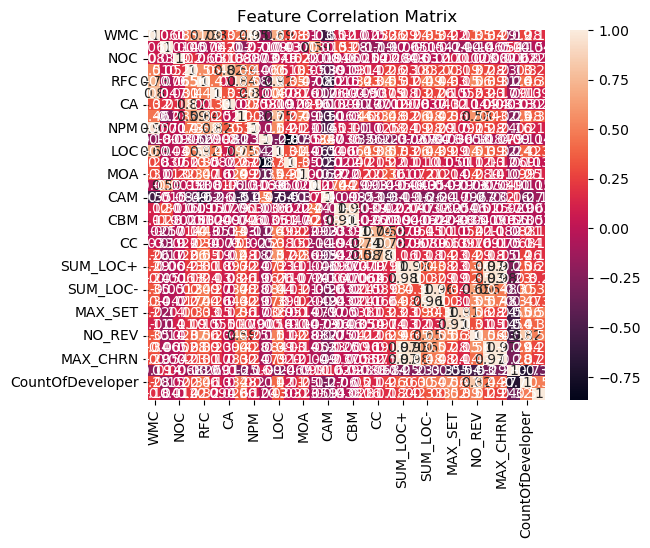

In [8]:
# Plot the correlation matrix for the features only in the dataset 
#correlation_matrix = x_change.corr()
#plt.figure(figsize=(12, 8))
#sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
#plt.title('Correlation Matrix')
#plt.show()
plot_correlation_matrix(X)

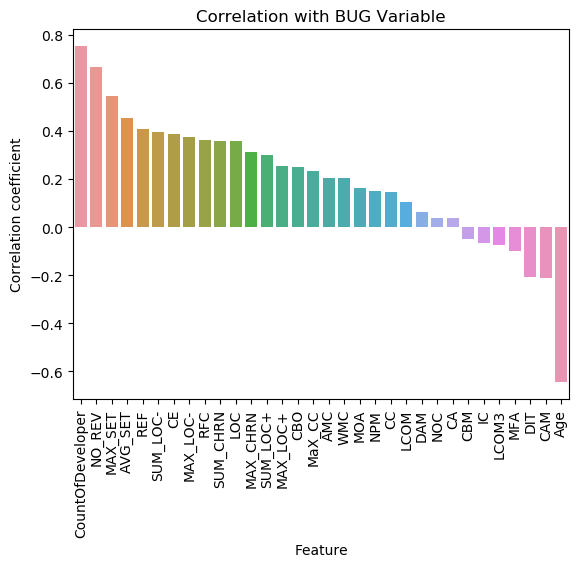

In [9]:

# Add the target variable back for correlation calculation (do not change this)
data_for_correlation = X.copy()
data_for_correlation['BUG'] = y

# Plot the correlation matrix for features and the BUG variable (do not change this)
plot_feature_response_correlation(data_for_correlation, 'BUG')


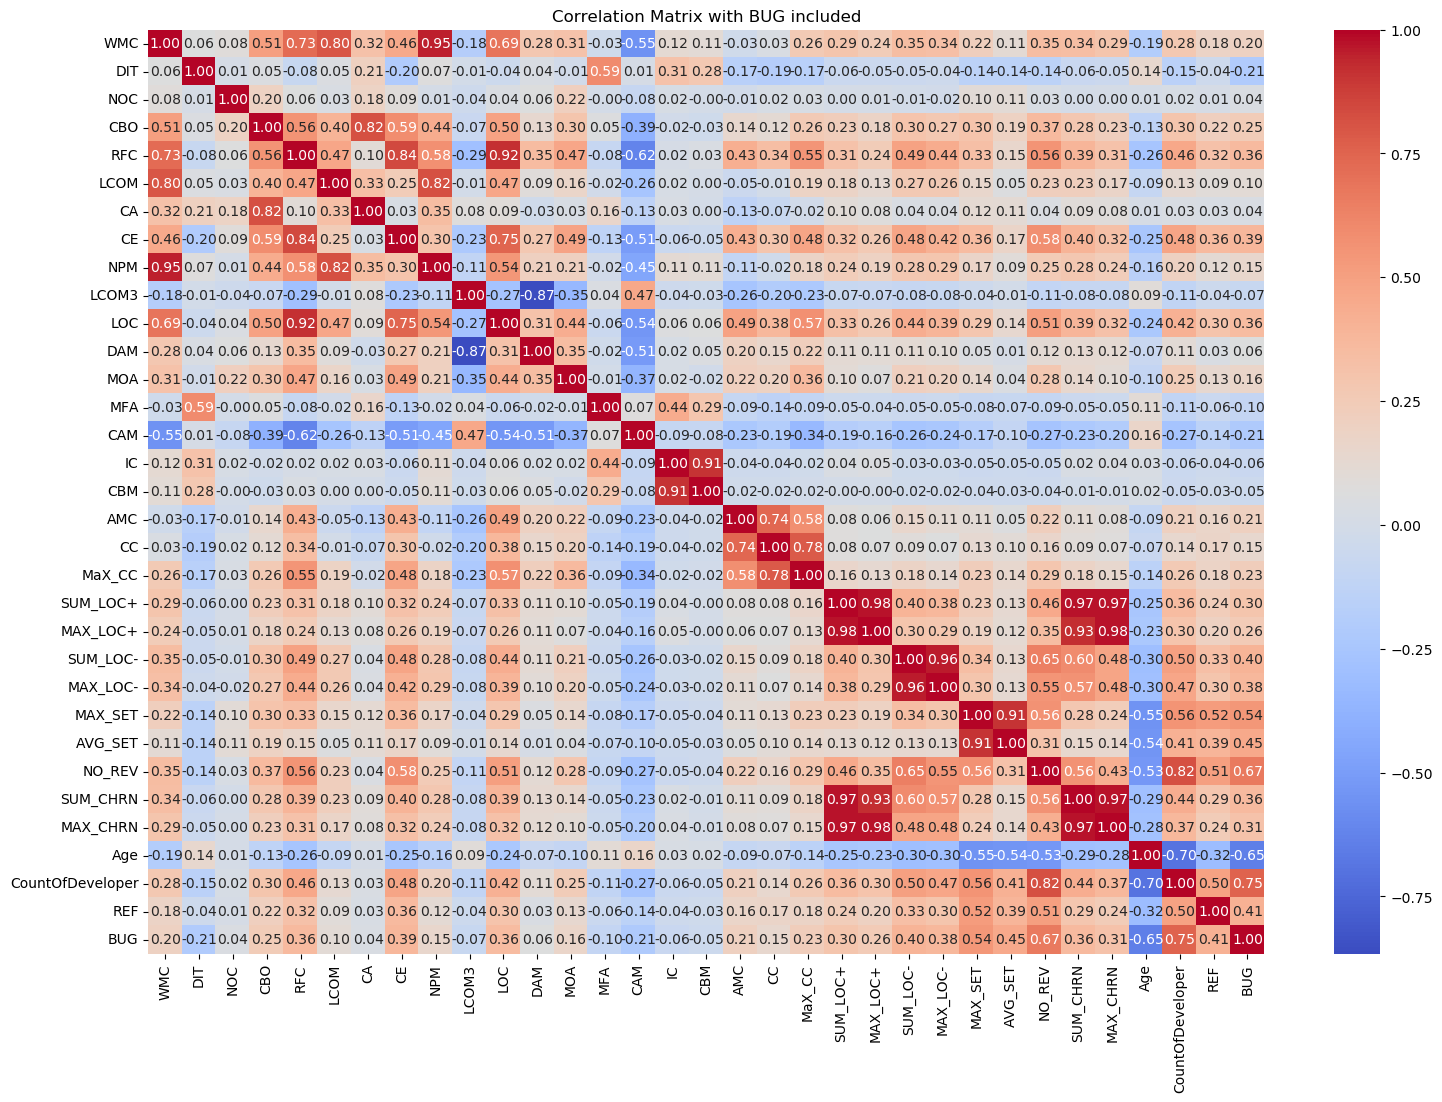

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it includes the 'BUG' column (do not change this)

# Calculate the correlation matrix including all features and the response variable 'BUG'
correlation_matrix = x_bug.corr()

# Plot the correlation matrix
plt.figure(figsize=(18,  12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix with BUG included')
plt.show()


# Define the classifiers (you can uncomment your choicses by removing the # to add to your execution)

In [11]:

classifiers = {
    #'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    #'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVC': SVC(probability=True, random_state=42),
    #'KNeighbors': KNeighborsClassifier(),
    #'DecisionTree': DecisionTreeClassifier(random_state=42)
}

# Iterate through the classifiers and evaluate each one (do not change this)


Classifier: SVC
Confusion Matrix:
[[99 11]
 [ 4 31]]


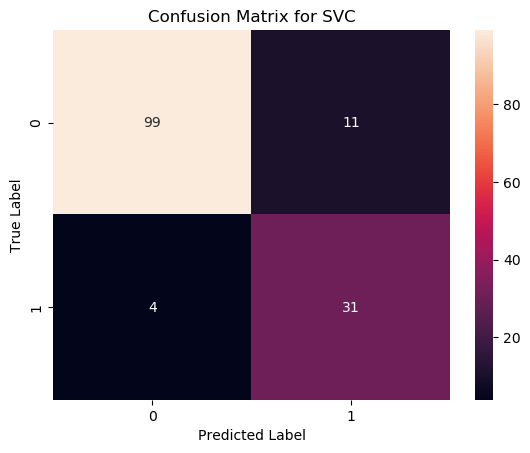

Performance Metrics for SVC:
Accuracy: 0.8966
Precision: 0.7381
Recall: 0.8857
MCC: 0.7412


In [12]:

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Compute the performance metrics
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Print classifier name and confusion matrix
    print(f"\nClassifier: {name}")
    print(f"Confusion Matrix:\n{cm}")

    # Plot the confusion matrix
    plot_confusion_matrix(cm, name)

    # List all performance metrics
    print(f"Performance Metrics for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"MCC: {mcc:.4f}")


# You may add codes below

False Positive Rate (FPR): 0.1000


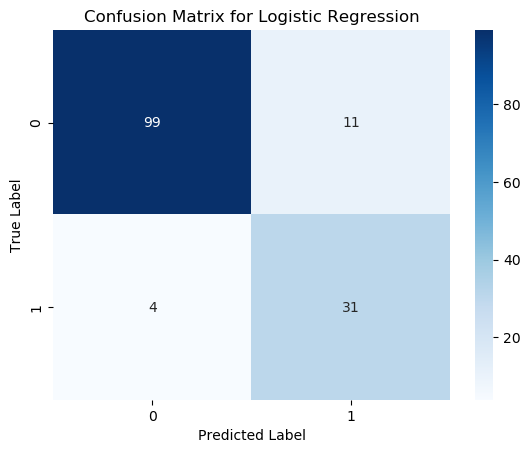

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `y_test` and `y_pred` are already defined
cm = confusion_matrix(y_test, y_pred)

# Extract True Negatives (TN), False Positives (FP), False Negatives (FN), and True Positives (TP)
TN, FP, FN, TP = cm.ravel()

# Calculate False Positive Rate (FPR)
FPR = FP / (FP + TN)

# Print the FPR
print(f"False Positive Rate (FPR): {FPR:.4f}")

# Optional: Visualize the confusion matrix
def plot_confusion_matrix(cm, classifier_name):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {classifier_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(cm, "Logistic Regression")


In [ ]:
# change_features = ['SUM_LOC-', 'SUM_LOC+', 'REF' ]  # Replace with your static/change/custom features
#x_change = X[change_features]  # Select only specific features
#This is where I would change the features according to my selections ^



#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# This is where I would change the label of X to whatever I decided my label should be ^



#from sklearn.metrics import confusion_matrix
#import seaborn as sns
#port matplotlib.pyplot as plt

# Assuming `y_test` and `y_pred` are already defined
#cm = confusion_matrix(y_test, y_pred)

# Extract True Negatives (TN), False Positives (FP), False Negatives (FN), and True Positives (TP)
#TN, FP, FN, TP = cm.ravel()

# Calculate False Positive Rate (FPR)
#FPR = FP / (FP + TN)

# Print the FPR
#print(f"False Positive Rate (FPR): {FPR:.4f}")

# Optional: Visualize the confusion matrix
#def plot_confusion_matrix(cm, classifier_name):
    #sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
   # plt.title(f'Confusion Matrix for {classifier_name}')
    #plt.xlabel('Predicted Label')
   # plt.ylabel('True Label')
    #plt.show()

#plot_confusion_matrix(cm, "Logistic Regression")
#This is the code I used to print a FPR for my selections ^

#correlation_matrix = x_change.corr()
#plt.figure(figsize=(12, 8))
#sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
#plt.title('Correlation Matrix')
#plt.show()
#plot_correlation_matrix(X)
#These are the changes I would make to labels for the coorelation matrix, If I did all features i simply deleted everything except for plot coorelation matrix.
